In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('train (2).csv')

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


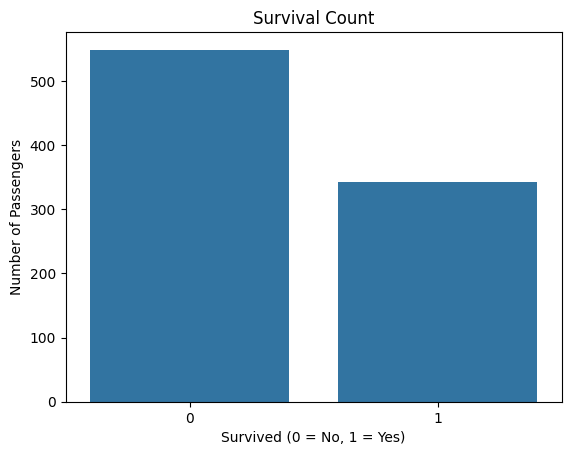

In [7]:
#count how many survived and how many did not
plt.figure()
sns.countplot(x="Survived", data=df)
plt.title("Survival Count")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Number of Passengers")
plt.show()

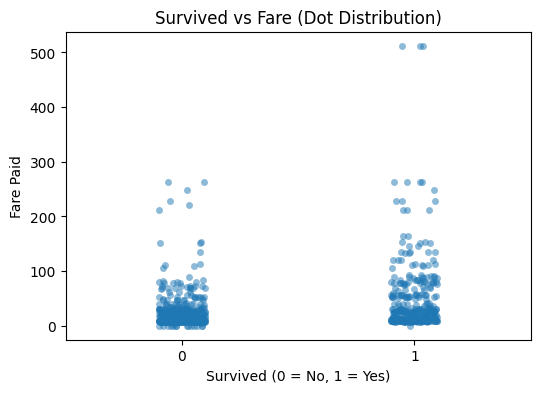

In [8]:
plt.figure(figsize=(6,4))
sns.stripplot(x="Survived", y="Fare", data=df, jitter=True, alpha=0.5)
plt.title("Survived vs Fare (Dot Distribution)")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Fare Paid")
plt.show()

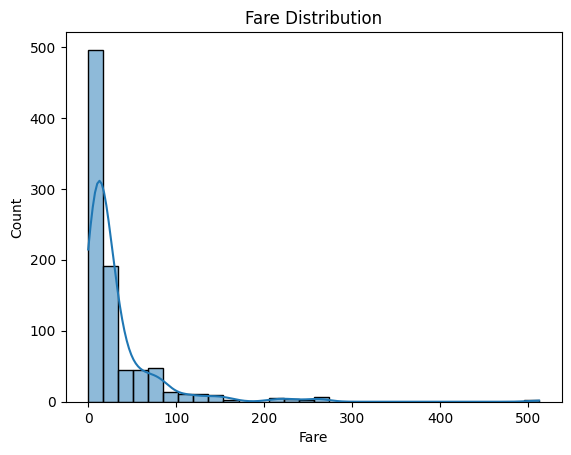

In [9]:
#Fare distribution
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

In [10]:
df["Fare"] = np.log1p(df["Fare"])

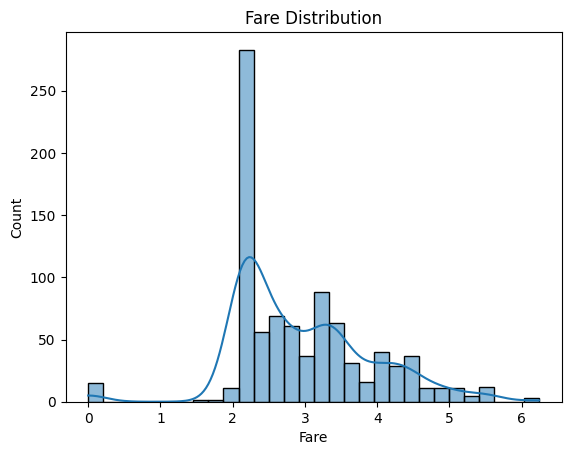

In [11]:
#Fare distribution after log transformation
sns.histplot(df["Fare"], bins=30, kde=True)
plt.title("Fare Distribution")
plt.show()

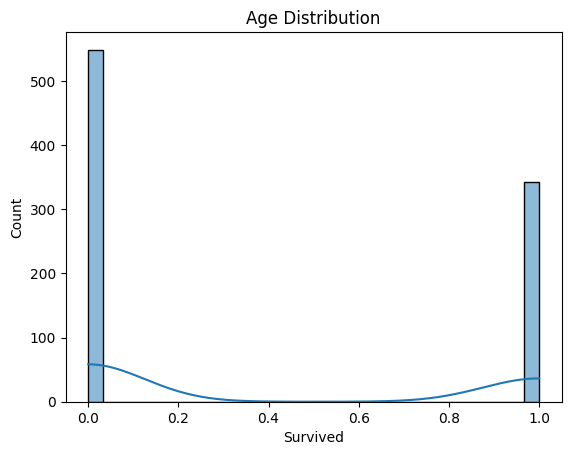

In [12]:
#Survived distribution
sns.histplot(df["Survived"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

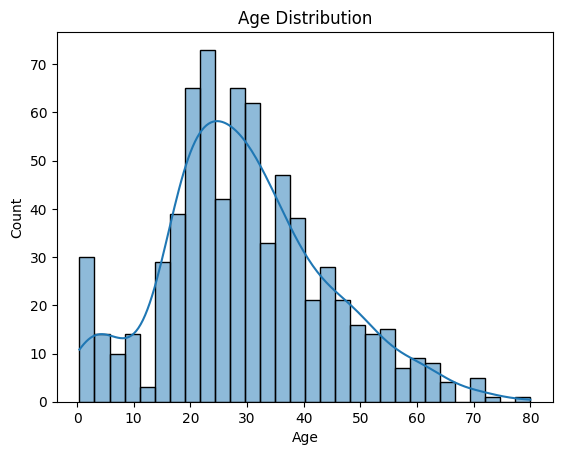

In [13]:
#Age distribution
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

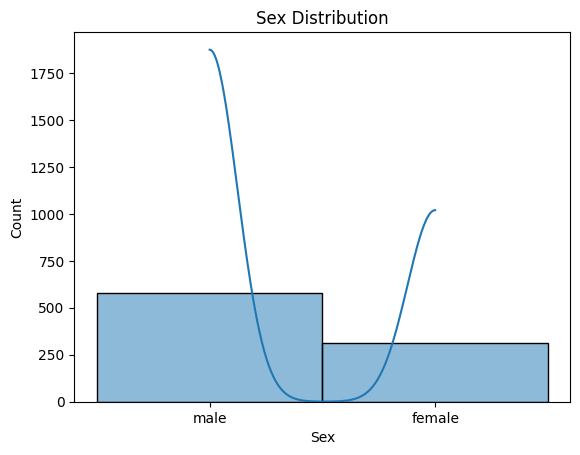

In [14]:
#Sex distribution
sns.histplot(df["Sex"], bins=30, kde=True)
plt.title("Sex Distribution")
plt.show()

In [15]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

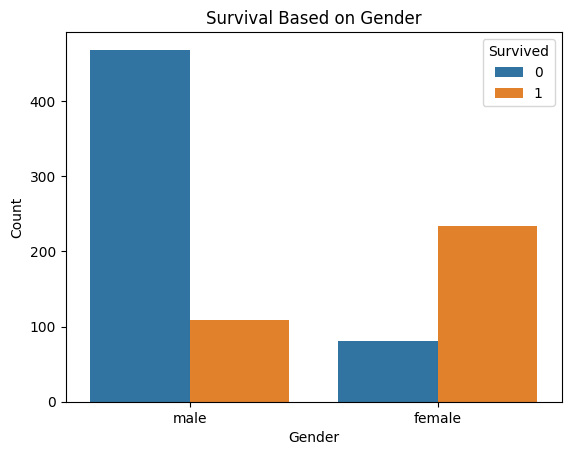

In [16]:
#Survival Count based on gender
plt.figure()
sns.countplot(x="Sex", hue="Survived", data=df)
plt.title("Survival Based on Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

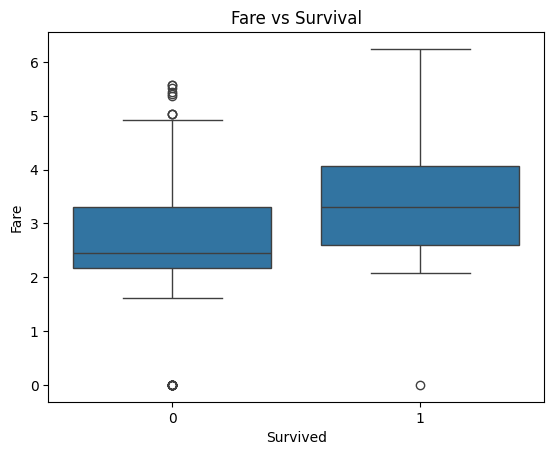

In [17]:
#BoxPlot
plt.figure()
sns.boxplot(x="Survived", y="Fare", data=df)
plt.title("Fare vs Survival")
plt.xlabel("Survived")
plt.ylabel("Fare")
plt.show()

In [18]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    str    
 4   Sex          891 non-null    str    
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    str    
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    str    
 11  Embarked     889 non-null    str    
dtypes: float64(2), int64(5), str(5)
memory usage: 83.7 KB


In [19]:
df=df.drop('PassengerId',axis=1)
df=df.drop('Ticket',axis=1)

In [20]:
for col in df.columns:
  print(col,df[col].nunique())

Survived 2
Pclass 3
Name 891
Sex 2
Age 88
SibSp 7
Parch 7
Fare 248
Cabin 147
Embarked 3


In [21]:
df['Age'].value_counts()

Age
24.00    30
22.00    27
18.00    26
28.00    25
19.00    25
         ..
24.50     1
0.67      1
0.42      1
34.50     1
74.00     1
Name: count, Length: 88, dtype: int64

In [22]:
df['Age'].isnull().sum()

np.int64(177)

In [23]:
#Replace age na with median
df["Age"] = df["Age"].fillna(df["Age"].median())

In [24]:
df=df.drop('Name',axis=1)

In [25]:
df["Deck"] = df["Cabin"].str[0]
df["Deck"] = df["Deck"].fillna("Unknown")
df = df.drop(columns=["Cabin"])

In [26]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,0,3,male,22.0,1,0,2.110213,S,Unknown
1,1,1,female,38.0,1,0,4.280593,C,C
2,1,3,female,26.0,0,0,2.188856,S,Unknown
3,1,1,female,35.0,1,0,3.990834,S,C
4,0,3,male,35.0,0,0,2.202765,S,Unknown


In [27]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.361582,0.523008,0.381594,2.962246
std,0.486592,0.836071,13.019697,1.102743,0.806057,0.969048
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,2.187218
50%,0.000000,3.000000,28.000000,0.000000,0.000000,2.737881
75%,1.000000,3.000000,35.000000,1.000000,0.000000,3.465736
max,1.000000,3.000000,80.000000,8.000000,6.000000,6.240917


In [28]:
#Creating a seperate column named as Family size by adding sibling and parentchildren columns
df["FamilySize"] = df["SibSp"] + df["Parch"] + 1
df = df.drop(columns=["SibSp", "Parch"])

In [29]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    str    
 3   Age         891 non-null    float64
 4   Fare        891 non-null    float64
 5   Embarked    889 non-null    str    
 6   Deck        891 non-null    str    
 7   FamilySize  891 non-null    int64  
dtypes: float64(2), int64(3), str(3)
memory usage: 55.8 KB


In [30]:
#Male->0 and Female->1
df["Sex"] = df["Sex"].map({"male": 0, "female": 1})

In [31]:
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,FamilySize
0,0,3,0,22.0,2.110213,S,Unknown,2
1,1,1,1,38.0,4.280593,C,C,2
2,1,3,1,26.0,2.188856,S,Unknown,1
3,1,1,1,35.0,3.990834,S,C,2
4,0,3,0,35.0,2.202765,S,Unknown,1


In [32]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [33]:
from sklearn.model_selection import train_test_split,GridSearchCV
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2,random_state=42,stratify=y)

In [34]:
cateogory = ["Embarked", "Deck"]
number = [col for col in x.columns if col not in cateogory]

In [35]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

In [36]:
num_scaler = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), number),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cateogory)
    ]
)

num_no_scaler = ColumnTransformer(
    transformers=[
        ("num", "passthrough", number),
        ("cat", OneHotEncoder(drop="first", handle_unknown="ignore"), cateogory)
    ]
)

In [37]:
pipelines = {
    "Random Forest": Pipeline([
        ("preprocessor", num_no_scaler),
        ("model", RandomForestClassifier(random_state=42))
    ]),

    "Decision Tree": Pipeline([
        ("preprocessor", num_no_scaler),
        ("model", DecisionTreeClassifier(random_state=42, class_weight="balanced"))
    ]),

    "Logistic Regression": Pipeline([
        ("preprocessor", num_scaler),
        ("model", LogisticRegression(max_iter=1000, class_weight="balanced"))
    ]),

    "SVM": Pipeline([
        ("preprocessor", num_scaler),
        ("model", SVC(probability=True, class_weight="balanced"))
    ])
}

In [38]:
#Defining parameters for Cross Validation
param_grids = {
    "Random Forest": {
        "model__n_estimators": [100, 200],
        "model__max_depth": [6, 10, None],
        "model__min_samples_split": [2, 5]
    },

    "Decision Tree": {
        "model__max_depth": [6, 10, None],
        "model__min_samples_leaf": [1, 2, 4]
    },

    "Logistic Regression": {
        "model__C": [0.1, 1, 10]
    },

    "SVM": {
        "model__C": [0.1, 1, 10],
        "model__kernel": ["linear", "rbf"]
    }
}

In [40]:
best_models = {}

for name, pipeline in pipelines.items():
    print(f"\n{'='*15} {name} Grid Search {'='*15}")

    grid = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grids[name],
        cv=5,
        scoring="f1",     # better for imbalance
        n_jobs=-1,
        verbose=1
    )

    grid.fit(x_train, y_train)
    best_model = grid.best_estimator_
    best_models[name] = best_model

    print("Best Parameters:", grid.best_params_)
    print("Best CV F1 Score:", grid.best_score_)

    # Predictions
    y_train_pred = best_model.predict(x_train)
    y_test_pred = best_model.predict(x_test)

    # Train metrics
    print("\nTraining Performance:")
    print("Accuracy:", accuracy_score(y_train, y_train_pred))
    print("F1:", f1_score(y_train, y_train_pred))
    print("Precision:", precision_score(y_train, y_train_pred))
    print("Recall:", recall_score(y_train, y_train_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred))

    print("\nTest Performance:")
    print("Accuracy:", accuracy_score(y_test, y_test_pred))
    print("F1:", f1_score(y_test, y_test_pred))
    print("Precision:", precision_score(y_test, y_test_pred))
    print("Recall:", recall_score(y_test, y_test_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))

    print("="*60)


=============== Random Forest Grid Search ===============
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters: {'model__max_depth': 6, 'model__min_samples_split': 2, 'model__n_estimators': 200}
Best CV F1 Score: 0.7555465232532793

Training Performance:
Accuracy: 0.8834269662921348
F1: 0.8349900596421471
Precision: 0.9130434782608695
Recall: 0.7692307692307693
Confusion Matrix:
 [[419  20]
 [ 63 210]]

Test Performance:
Accuracy: 0.7988826815642458
F1: 0.7049180327868853
Precision: 0.8113207547169812
Recall: 0.6231884057971014
Confusion Matrix:
 [[100  10]
 [ 26  43]]

=============== Decision Tree Grid Search ===============
Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Parameters: {'model__max_depth': 6, 'model__min_samples_leaf': 4}
Best CV F1 Score: 0.747411427980966

Training Performance:
Accuracy: 0.848314606741573
F1: 0.8118466898954704
Precision: 0.7740863787375415
Recall: 0.8534798534798534
Confusion Matrix:
 [[371  68]
 [ 40 233]]


In [41]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix

lgbm = LGBMClassifier(
    n_estimators=350,
    learning_rate=0.02,
    max_depth=-1,
    num_leaves=10,
    class_weight="balanced",
    random_state=42
)

# Apply the preprocessor to transform categorical features before fitting LGBM
x_train_transformed = num_no_scaler.fit_transform(x_train)
x_test_transformed = num_no_scaler.transform(x_test)

lgbm.fit(x_train_transformed, y_train)

y_train_pred_lgbm = lgbm.predict(x_train_transformed)
y_test_pred_lgbm = lgbm.predict(x_test_transformed)

print(f"\n{'='*15} LightGBM Performance {'='*15}")

# Train metrics
print("\nTraining Performance:")
print("Accuracy:", accuracy_score(y_train, y_train_pred_lgbm))
print("F1:", f1_score(y_train, y_train_pred_lgbm))
print("Precision:", precision_score(y_train, y_train_pred_lgbm))
print("Recall:", recall_score(y_train, y_train_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_train, y_train_pred_lgbm))

print("\nTest Performance:")
print("Accuracy:", accuracy_score(y_test, y_test_pred_lgbm))
print("F1:", f1_score(y_test, y_test_pred_lgbm))
print("Precision:", precision_score(y_test, y_test_pred_lgbm))
print("Recall:", recall_score(y_test, y_test_pred_lgbm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred_lgbm))
print("="*60)

[LightGBM] [Info] Number of positive: 273, number of negative: 439
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001421 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 212
[LightGBM] [Info] Number of data points in the train set: 712, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000

=============== LightGBM Performance ===============

Training Performance:
Accuracy: 0.9044943820224719
F1: 0.8740740740740741
Precision: 0.8838951310861424
Recall: 0.8644688644688645
Confusion Matrix:
 [[408  31]
 [ 37 236]]

Test Performance:
Accuracy: 0.7821229050279329
F1: 0.6976744186046512
Precision: 0.75
Recall: 0.6521739130434783
Confusion Matrix:
 [[95 15]
 [24 45]]
